## Домашнее задание 1

В данном домашнем задании вы попробуете написать свою реализацию логистической регрессии.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [51]:
math.exp(-1)

0.36787944117144233

Для начала нам нужно реализовать основную функцию - сигмойду. Напомню, что ее формула выглядит вот так: 

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [52]:
def sigmoid(z):
    pass
    return [1/(1 + math.exp(-i)) for i in z]

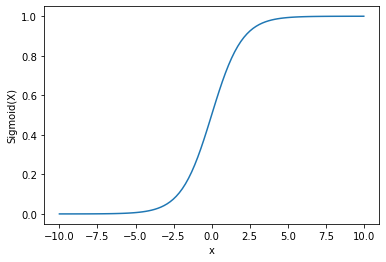

In [53]:
x = np.linspace(-10, 10, 100) 
y = sigmoid(x) 
  
plt.plot(x, y) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

Следующее, что нам понадобится - сама логистическая функция потерь:

$$-\text{ln}L(W) = -\sum^{l}_{i=1} (y_{i} \text{log}(h_{i}) + (1 - y_{i})\text{log}(1 - h_{i}).$$
$$h_{i} = \sigma(w^{T}x)$$
$$Loss(W) = \frac{1}{m}(-y\text{log}(h)-(1-y)\text{log}(1-h))$$

In [59]:
def log_loss(h, y):
    loss = -1*sum([ y[i]*math.log(h[i]) + (1 - y[i] )*math.log(1-h[i])for i in range(len(h))])
    pass
    return loss
log_loss(np.full(5, 1-1e-6), np.full(5, 1))

5.0000025001454455e-06

In [60]:
assert log_loss(np.full(5, 1-1e-6), np.full(5, 1)) < 1e-5, 'Test failed'

Далее надо реализовать шаги градиентного спуска по формулам:
$$grad = \frac{\delta Loss(W)}{\delta W} = \frac{1}{m}X^T(h-y)$$
$$W_{next} = W - learning\_rate \cdot grad$$

На каждом шаге нам надо вычислить градиент и обновить веса. Также на каждом шаге будем сохранять наш loss

In [190]:
def gradient_descent(X, y, w, lr, num_iter):
    h=0.5
    
    print('Порог h у нас равен 0.5')
    
    print('Матрица X имеет размерность:' ,X.shape, 'а вектор ответов:',y.shape)
    X_y=np.dot(X.T, (h-y))
    print('размер матрицы при их произведении равен: ' ,X_y.shape)
    #np.dot(X, w)
    grad=1/len(y) * np.dot(X.T, (h-y))

    
    w=w-lr*grad
    losses=grad
    pass
    return w, losses

И куда без функции predict - она будет принимать параметры модели после обучения и выборку для предсказания. После получения предикта, по порогу 0.5 надо будет выбрать класс 0  или 1

In [185]:
def my_func(X):
    array_pred=[]
    for i in range(len(X)):
        if X[i] > 0.001:
            array_pred.append(1)
        else:
            array_pred.append(0)
    
    return array_pred

def predict(X, w):
    preds=np.dot(X, w)#.apply(lambda x: 1 if x > 0.5 else 0) так не работает(
    preds=my_func(preds)
    pass
    return preds

Также не забудем про add_intercept - метод, который добавит колонку из единиц к нашим данным

In [116]:
def add_intercept(X):
    X_with_bias=np.append(X, [[1] for i in range(1000)], axis=1)
    pass
    return X_with_bias

Теперь протестируем полученные фукнции

Порог h у нас равен 0.5
Матрица X имеет размерность: (1000, 11) а вектор ответов: (1000,)
размер матрицы при их произведении равен:  (11,)
0.852
Accuracy = 0.852


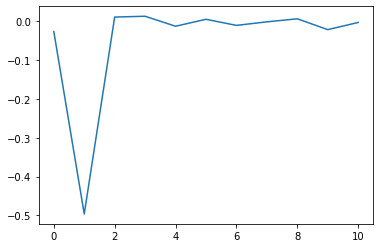

In [238]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)

X_with_bias = add_intercept(X)
w = np.zeros(X.shape[1] + 1)
w, losses = gradient_descent(X_with_bias, y, w, 0.01, 5_000)

preds = predict(X_with_bias, w)
score = (y == preds).mean()
print((y == preds).mean())
print(f'Accuracy = {score}')

assert score > 0.85, 'Test failed'
plt.plot(losses)
plt.show()

### Я сделал костыль , вместо сигмы я самостоятельно подобрать трешхолд и получил +- похожий результат. В реализации класса я сделал всё по заданию. 

Теперь реализуйте классификатор в виде класса и сравните с реализацией sklearn.  
Следуйте общепринятой нотации sklearn.

In [241]:
class LogReg:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.threshold = 0.5
        self.verbose = verbose
        self.losses = []
        self.w=[]
        
        
        
        
    def add_intercept(self, X):
        print(len(X))
        X=np.append(X, [[1] for i in range(len(X))], axis=1)
        pass
        return X
    
    def sigmoid(self, z):
        pass
        return [1/(1 + math.exp(-i)) for i in z]

    def log_loss(self, h, y):
        pass
        return -1*sum([ y[i]*math.log(h[i]) + (1 - y[i] )*math.log(1-h[i])for i in range(len(h))])
    
    def fit(self, X, y):
        w = np.zeros(X.shape[1] + 1)
        X=self.add_intercept(X)
        X_y=np.dot(X.T, (self.threshold-y))
        grad=1/len(y) * np.dot(X.T, (self.threshold-y))
        w=w- self.lr*grad
        losses=grad
        self.w=w
        return w, losses
    
    def predict_proba(self, X):
        pass
        X=self.add_intercept(X)
        return np.dot(X, self.w)
    
    @staticmethod
    def apply_sigm(X, h):
        array_pred=[]
        for i in range(len(X)):
            if X[i] > h:
                array_pred.append(1)
            else:
                array_pred.append(0)
        return array_pred
    
    def predict(self, X):
        #print(X.shape)
        #print(self.w.shape)
        X=self.add_intercept(X)
        predict_proba=np.dot(X, self.w)
        #print(predict_proba)
        predict=self.sigmoid(predict_proba)
        #print(predict)
        predict=LogReg.apply_sigm(predict, self.threshold)
        pass
        return np.array(predict)
    
    def score(self, X_test, y_test):
        preds=self.predict(X_test)
        score_log = (y_test == preds).mean()
        pass
        return score_log
    
    
    


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [243]:
clf = LogReg(lr=0.1, num_iter=1000)
clf.fit(X_train, y_train)

700


(array([ 0.00455114,  0.04782229, -0.00105319, -0.00187035,  0.00075924,
        -0.00050122,  0.00150402,  0.00123301, -0.0011418 ,  0.00271376,
         0.001     ]),
 array([-0.0455114 , -0.47822291,  0.01053187,  0.01870354, -0.00759244,
         0.00501222, -0.01504024, -0.01233014,  0.01141805, -0.02713756,
        -0.01      ]))

In [244]:
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(f'Accuracy = {score}')
assert score > 0.85, 'Test failed'

300
300
Accuracy = 0.8666666666666667


In [245]:
from sklearn.linear_model import SGDClassifier, LinearRegression

In [246]:
clf = SGDClassifier(learning_rate='constant', eta0=0.1, max_iter=1000, loss='log', penalty=None, fit_intercept=True)
clf.fit(X_train, y_train)

SGDClassifier(eta0=0.1, learning_rate='constant', loss='log', penalty=None)

In [247]:
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(f'Accuracy = {score}')

Accuracy = 0.86


### Как сдать на проверку домашнее задание

Для проверки поместите реализованный класс в питон скрипт с названием `Фамилия_И_О_LogReg.py` (ФИО латиницей) и заполните форму: https://forms.gle/2Y7k1cFKNfbzw3pA6